In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv


In [2]:
data = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv')
data.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
# convert b_day column to get just year
data['b_day'] = pd.to_datetime(data['b_day']).dt.year

# get height in meters
data['height'] = pd.to_numeric(data['height'].apply(lambda x: x.split('/')[1]))

# get weight in kgs
data['weight'] = pd.to_numeric(data['weight'].apply(lambda x: x.split('/')[1].split('kg')[0]))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    429 non-null    object 
 1   rating       429 non-null    int64  
 2   jersey       429 non-null    object 
 3   team         406 non-null    object 
 4   position     429 non-null    object 
 5   b_day        429 non-null    int64  
 6   height       429 non-null    float64
 7   weight       429 non-null    float64
 8   salary       429 non-null    object 
 9   country      429 non-null    object 
 10  draft_year   429 non-null    int64  
 11  draft_round  429 non-null    object 
 12  draft_peak   429 non-null    object 
 13  college      363 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 47.0+ KB


In [5]:
# convert salary to int64 by removing $ sign
data['salary'] = pd.to_numeric(data['salary'].apply(lambda x: x[1:]))

# convert draft_peak to int64 by replacing 'Undrafted' to 0
data['draft_peak'] = pd.to_numeric(data['draft_peak'].replace('Undrafted', 0))

# update position column (determined in EDA)
data['position'] = data['position'].map({'F':'F', 'F-G': 'F-G', 'G':'G', 'F-C':'F-C', 'C':'C', 'G-F':'F-G', 'C-F':'F-C'})

# EDA

<AxesSubplot:xlabel='salary', ylabel='Count'>

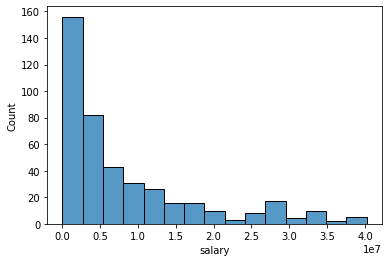

In [6]:
# check distribution of target
sns.histplot(data['salary'])

In [7]:
def plot_numerical(feature):
    sns.lmplot(x=feature, y='salary', data=data)
    plt.show()
    
def plot_categorical(feature, figsize=None):
    df = data.groupby([feature])['salary'].describe()[['mean', '50%', 'min', 'count']]

    labels = df.index.values
    x = np.arange(len(labels))
    width = 0.9
    fig, ax1 = plt.subplots(figsize=(18, 5))

    # plot bars for min, median and mean salary
    rects1 = ax1.bar(x-width/2, df['50%'], width/3, label='median')
    rects2 = ax1.bar(x-width/6, df['mean'], width/3, label='mean')
    rects3 = ax1.bar(x+width/6, df['min'], width/3, label='min')

    ax1.set_ylabel('Salary', fontsize=12)
    ax1.set_title(feature, fontsize=15)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=90)
    ax1.legend()

    # plot counts of data points
    ax2 = ax1.twinx()
    ax2.set_ylabel('Counts', fontsize=12)
    ax2.plot(x-width/2, df['count'], color='red', linestyle='dashed')

    # annotate counts of data points
    for i, rect in enumerate(rects2):
        height = int(round(rect.get_height()))
        ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', color='red')
    plt.show()

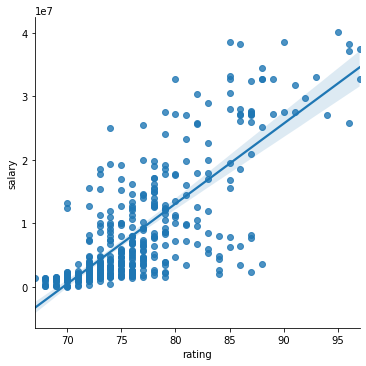

In [8]:
for feature in ['rating']:
    plot_numerical(feature)

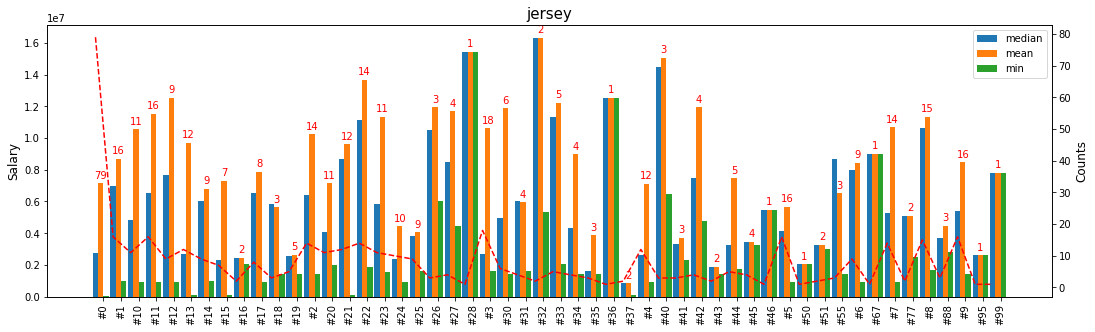

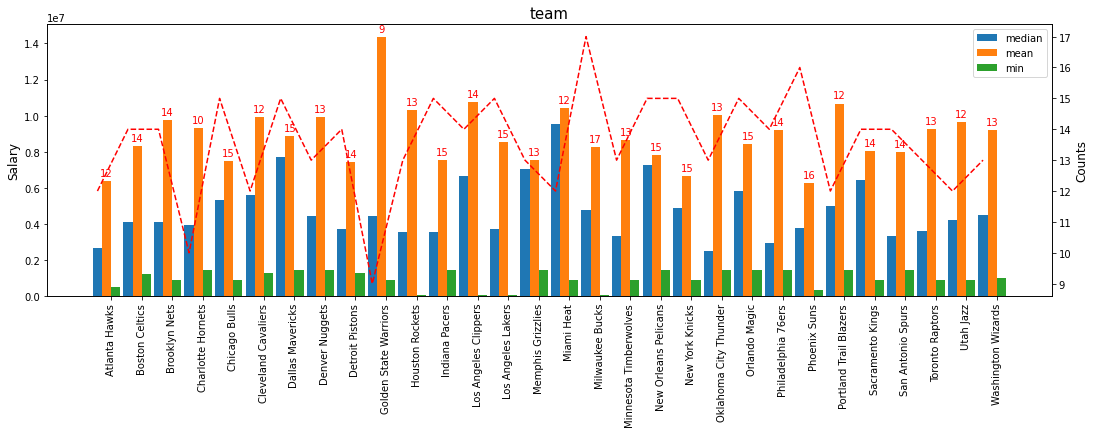

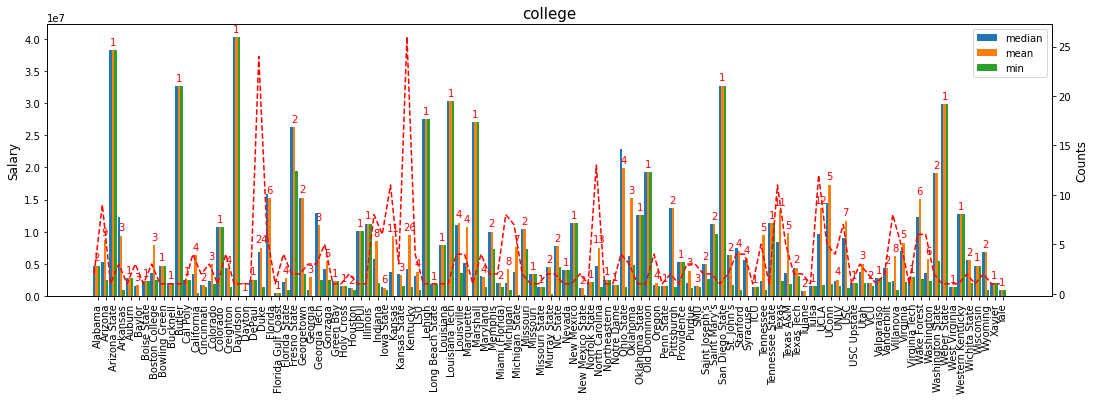

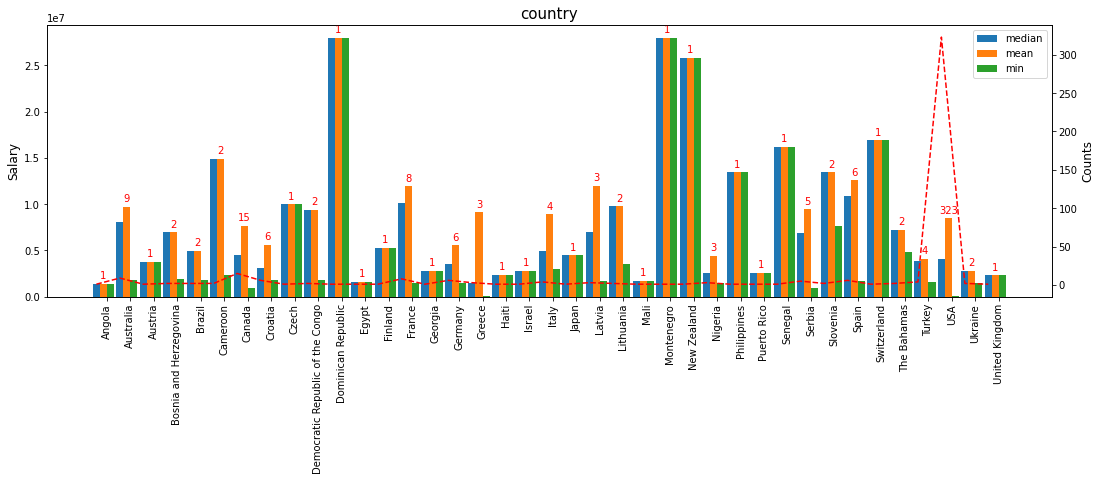

In [9]:
for feature in ['jersey', 'team', 'college', 'country']:
    plot_categorical(feature)

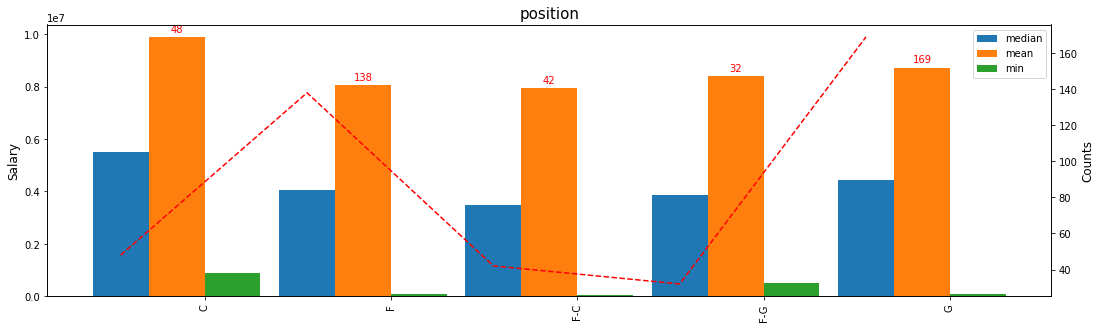

In [10]:
for feature in ['position']:
    plot_categorical(feature)

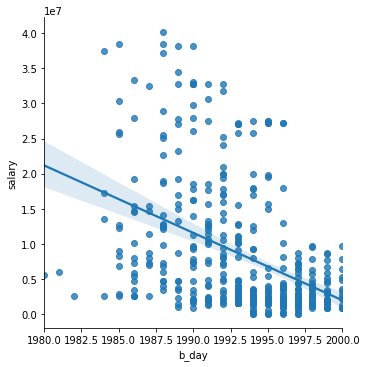

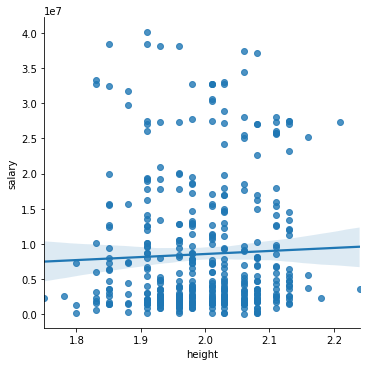

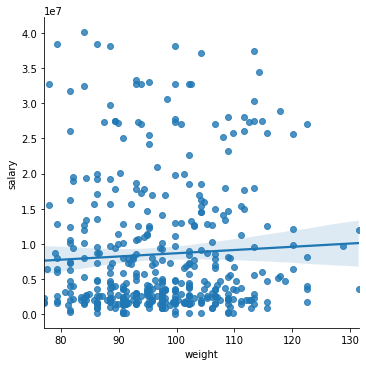

In [11]:
for feature in ['b_day', 'height', 'weight']:
    plot_numerical(feature)

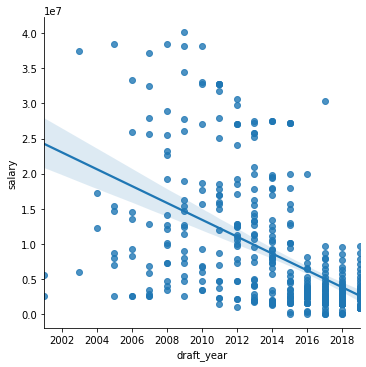

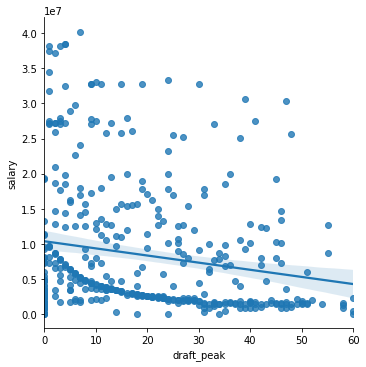

In [12]:
for feature in ['draft_year', 'draft_peak']:
    plot_numerical(feature)

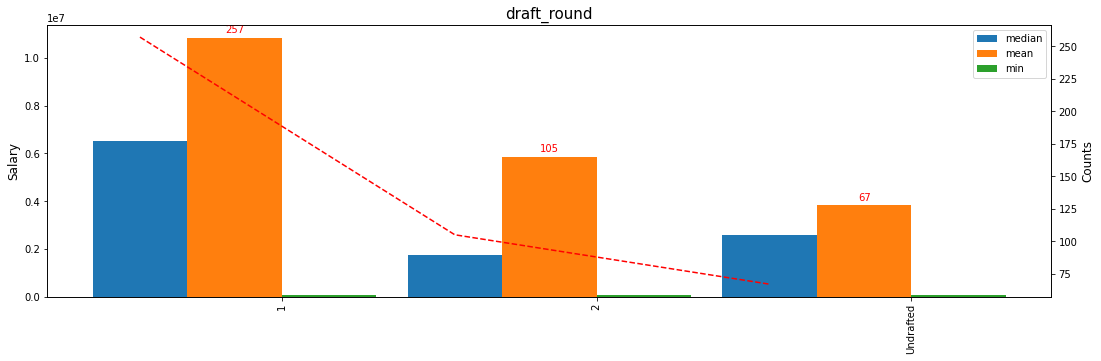

In [13]:
plot_categorical('draft_round')

**Columns that are contributing towards high Salary-**
* rating - +ve
* position - 'C' position gets the highest salary
* b_day - aged players are getting higher salary
* draft_year - newer the player lesser is the salary
* draft_round - players drafted in 1st round get higher salary while Undrafted get the least





In [14]:
categorical_features = ['jersey', 'team', 'position', 'country', 'draft_round', 'college']
numerical_features = ['rating', 'b_day', 'height', 'weight', 'draft_year', 'draft_peak']
to_drop = ['full_name'] # contain all unique values

# Label encoding categorical features for correlation

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [16]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

# CORRELATION

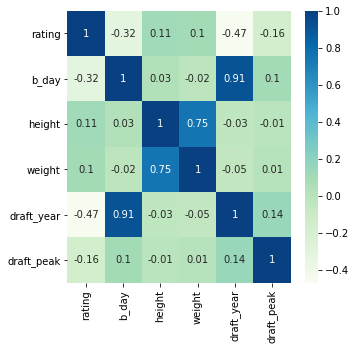

In [17]:
# Bivariate Analysis Correlation plot with the Numeric variables
plt.figure(figsize=(5, 5))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

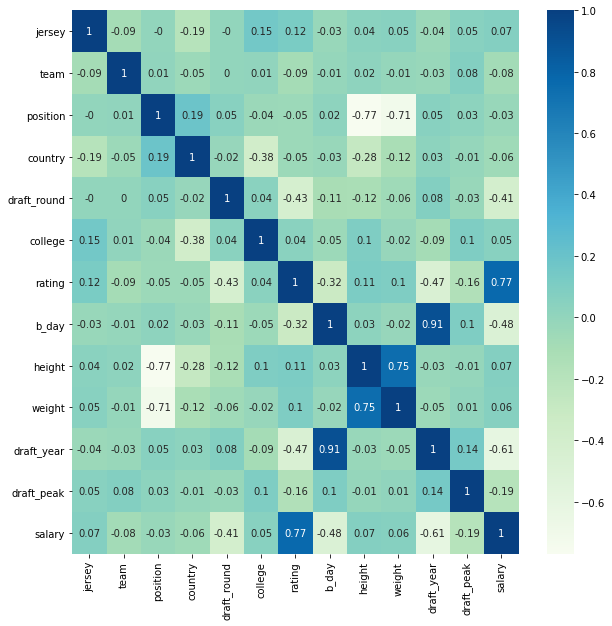

In [18]:
# Bivariate Analysis Correlation plot with the Categorical variables
plt.figure(figsize=(10, 10))
sns.heatmap(round(df[categorical_features+numerical_features+['salary']].corr(method='spearman'), 2), annot=True,
            mask=None, cmap='GnBu')
plt.show()

**Observations:**
* b_day - draft_year
* height - weight
* position - height and weight (-ve)

# Removing features using VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
# Calculating VIF
vif = pd.DataFrame()
temp = df.dropna()
vif["variables"] = [feature for feature in categorical_features+numerical_features if feature not in ['team', 'college', 'draft_year', 
                                                                                                      'height', 
                                                                                                      'weight', 'b_day', 'country']]
vif["VIF"] = [variance_inflation_factor(temp[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

     variables       VIF
0       jersey  2.236552
1     position  3.295873
2  draft_round  1.505628
3       rating  5.566075
4   draft_peak  2.213447


# Handling Missing Values

In [21]:
missingValueFeatures = pd.DataFrame({'missing %': data.isnull().sum()*100/len(data)})
missingValueFeatures[missingValueFeatures['missing %']>0]

,missing %
team,5.361305
college,15.384615


team and college are not correlated to any other feature and are highly uncorrelated to each other as well. As the colleg or team are not affecting the salary much, we may drop them while training model

# Handling Categorical Features (Label Encoding & One Hot Encoding)

In [22]:
# update categorical features to use only quality features using vif and correlation observations
# jersey is ignored as it is very sparsed data and also due to lack of good no. of data points
categorical_features = ['position', 'draft_round']

In [23]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    # load classes
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))

    if len(le.classes_)>2:
        # perform one hot encoding
        ohe.fit(df[[feature]])
        # save the encoder
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))

        # transfrom training data
        # removing first column of encoded data to elude from dummy variable trap
        tempData = ohe.transform(df[[feature]])[:, 1:]

        # create Dataframe with columns as classes
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[[feature]]
    
    # create dataframe with all the label encoded categorical features along with hot encoding
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [24]:
# merge numerical features and categorical encoded features
df = df[numerical_features+['salary']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rating                 429 non-null    int64  
 1   b_day                  429 non-null    int64  
 2   height                 429 non-null    float64
 3   weight                 429 non-null    float64
 4   draft_year             429 non-null    int64  
 5   draft_peak             429 non-null    int64  
 6   salary                 429 non-null    int64  
 7   position F             429 non-null    float64
 8   position F-C           429 non-null    float64
 9   position F-G           429 non-null    float64
 10  position G             429 non-null    float64
 11  draft_round 2          429 non-null    float64
 12  draft_round Undrafted  429 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 43.7 KB


# Training Model

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [26]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['b_day', 'salary', 'height', 'weight',  'draft_peak'])]

''' Rescaling to [0,1] '''
scaler = StandardScaler()
scaler.fit(train_data[feature_cols])
train_data[feature_cols] = scaler.transform(train_data[feature_cols])

In [27]:
X = train_data[feature_cols]
y = train_data['salary']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, 
                                                    random_state=0)

# Model 1: Linear Regression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_train)

print('Train metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('Accuracy: ', round(model.score(X_train, y_train)*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy: ', round(model.score(X_test, y_test)*100, 2))

Train metrics...
RMSE:  5476035.758956945
Accuracy:  63.82
Validation metrics...
RMSE:  5194167.397759814
Accuracy:  70.69


In [30]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred))), y=y_pred,
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test,
                         mode='lines',
                         name='True value'))

fig.show()

In [31]:
model = XGBRegressor( 
    n_estimators = 300,
    learning_rate=0.2, 
    min_child_weight=3,
    max_depth = 2,
    subsample = 0.75,
    seed=0)


model = model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    early_stopping_rounds=20,
    eval_set=[(X_test,y_test)],
    verbose=False)

In [32]:
y_pred = model.predict(X_train)

print('Train metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('Accuracy: ', round(model.score(X_train, y_train)*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy: ', round(model.score(X_test, y_test)*100, 2))

Train metrics...
RMSE:  4441340.359179827
Accuracy:  76.2
Validation metrics...
RMSE:  4063611.525234461
Accuracy:  82.06


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred))), y=y_pred,
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test,
                         mode='lines',
                         name='True value'))

fig.show()